# Comparison between K-means and GMM

## Libraries Import

In [1]:
import random

import matplotlib.pyplot as pyplot
import numpy as np
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

## Configuration

In [2]:
POINTS_COUNT = 1500
CLUSTERS_COUNT = 3
MAX_SEED = 1000
DEVIATIONS = [1.0, 2.5, 0.5]
ANISOTROPIC_TRANSFORM = [[0.6, -0.6], [-0.4, 0.8]]

## Points Generation

In [3]:
X_anisotropic, y_anisotropic = datasets.make_blobs(n_samples=POINTS_COUNT, random_state=random.randint(0, MAX_SEED))
X_anisotropic = np.dot(X_anisotropic, ANISOTROPIC_TRANSFORM)

In [4]:
X_varied, y_varied = datasets.make_blobs(n_samples=POINTS_COUNT, cluster_std=DEVIATIONS, random_state=random.randint(0, MAX_SEED))

In [5]:
def plot_points(X: np.matrix, y: np.array, title: str) -> None:
    sns.scatterplot(X[:, 0], X[:, 1], y)
    pyplot.title(title)
    pyplot.show()

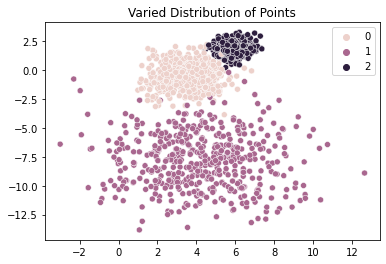

In [6]:
plot_points(X_varied, y_varied, "Varied Distribution of Points")

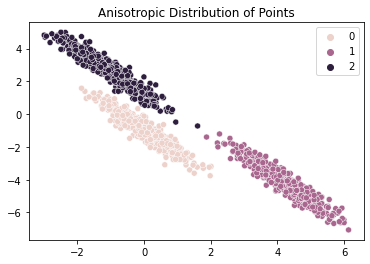

In [7]:
plot_points(X_anisotropic, y_anisotropic, "Anisotropic Distribution of Points")

## K-means Clustering

In [8]:
y_pred_varied = KMeans(n_clusters=CLUSTERS_COUNT).fit_predict(X_varied)
y_pred_anisotropic = KMeans(n_clusters=CLUSTERS_COUNT).fit_predict(X_anisotropic)

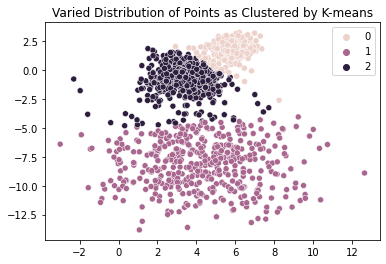

In [9]:
plot_points(X_varied, y_pred_varied, "Varied Distribution of Points as Clustered by K-means")

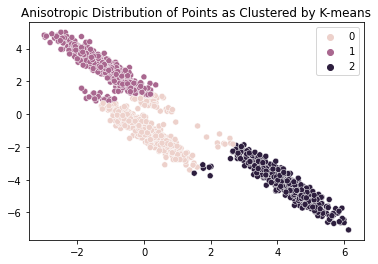

In [10]:
plot_points(X_anisotropic, y_pred_anisotropic, "Anisotropic Distribution of Points as Clustered by K-means")

## GMM Clustering

In [11]:
y_pred_varied = GaussianMixture(n_components=CLUSTERS_COUNT).fit_predict(X_varied)
y_pred_anisotropic = GaussianMixture(n_components=CLUSTERS_COUNT).fit_predict(X_anisotropic)

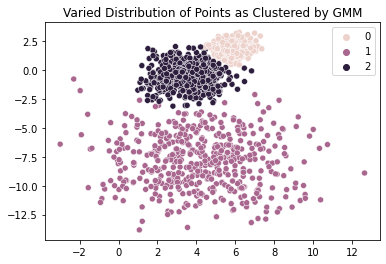

In [12]:
plot_points(X_varied, y_pred_varied, "Varied Distribution of Points as Clustered by GMM")

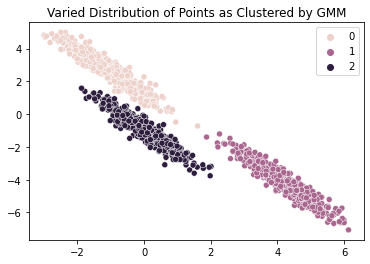

In [13]:
plot_points(X_anisotropic, y_pred_anisotropic, "Varied Distribution of Points as Clustered by GMM")